# Datazen Round 2 - DataScience

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
data = pd.read_csv('tech_team_train.csv')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
5,17388,495,3247,5,2011-11-27 12:52:00,1.65,15351.0,35
6,18494,165,3377,1,2011-12-08 20:01:00,1.25,12748.0,35
7,17109,2597,3435,1,2011-11-23 12:40:00,1.25,16255.0,35
8,17143,1945,2352,1,2011-11-23 14:07:00,5.75,17841.0,35
9,8422,3311,2502,6,2011-06-22 10:11:00,2.95,13849.0,35


In [3]:
## Adding the 'TotalPrice' column to the dataset by multiplying the values in the 'Quantity' and 'UnitPrice'column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,11.25
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,11.70
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,23.80
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,0.83
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,19.80
...,...,...,...,...,...,...,...,...,...
199995,19930,170,1953,-1,2011-05-12 10:29:00,1.65,14606.0,35,-1.65
199996,9942,2075,3500,6,2011-07-27 14:21:00,2.08,12397.0,3,12.48
199997,15999,856,318,2,2011-11-11 10:49:00,3.75,17295.0,35,7.50
199998,3833,441,2424,1,2011-03-11 13:03:00,0.85,15311.0,35,0.85


In [4]:
# Eliminating values that cause problems with clustering
data = data[(data['TotalPrice'] >= -400) & (data['TotalPrice'] <= 400)]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,11.25
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,11.70
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,23.80
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,0.83
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,19.80
...,...,...,...,...,...,...,...,...,...
199995,19930,170,1953,-1,2011-05-12 10:29:00,1.65,14606.0,35,-1.65
199996,9942,2075,3500,6,2011-07-27 14:21:00,2.08,12397.0,3,12.48
199997,15999,856,318,2,2011-11-11 10:49:00,3.75,17295.0,35,7.50
199998,3833,441,2424,1,2011-03-11 13:03:00,0.85,15311.0,35,0.85


In [5]:
## setting X
X = data.iloc[:, [8]].values
print(X)

[[11.25]
 [11.7 ]
 [23.8 ]
 ...
 [ 7.5 ]
 [ 0.85]
 [ 5.04]]


## Encoding categorical data

In [7]:
from sklearn import preprocessing

country = data.iloc[:, [7]]

le = preprocessing.LabelEncoder()
X_c = country.apply(le.fit_transform)

enc = preprocessing.OneHotEncoder()
enc.fit(X_c)
encodedlabels = enc.transform(X_c).toarray()

print(encodedlabels)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\Users\riyar\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [8]:
## Concatenating the encoded categorical data
X = np.concatenate((X, encodedlabels), axis=1)
print(X)

[[11.25  0.    0.   ...  0.    1.    0.  ]
 [11.7   0.    0.   ...  0.    1.    0.  ]
 [23.8   0.    0.   ...  0.    1.    0.  ]
 ...
 [ 7.5   0.    0.   ...  0.    1.    0.  ]
 [ 0.85  0.    0.   ...  0.    1.    0.  ]
 [ 5.04  0.    0.   ...  0.    0.    0.  ]]


## Using the elbow method to find the optimal number of clusters

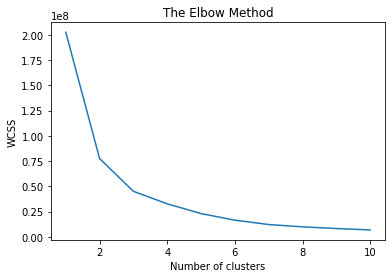

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### From the graph we can infer that the optimum number of clusters would be 3 because thats where the curve starts decreasing

## Training the K-Means model on the dataset

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y = kmeans.fit_predict(X)

In [11]:
X_p = np.concatenate((X[:, :1], country.values), axis = 1)
print(X_p)

[[11.25 35.  ]
 [11.7  35.  ]
 [23.8  35.  ]
 ...
 [ 7.5  35.  ]
 [ 0.85 35.  ]
 [ 5.04 13.  ]]


## Visualising the clusters

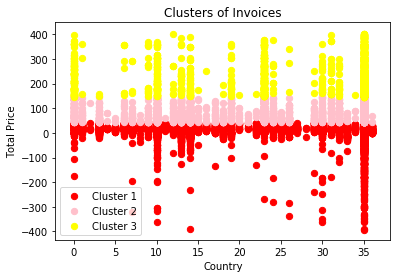

In [12]:
plt.scatter(X_p[y == 0, 1], X_p[y == 0, 0], s = 40, c = 'red', label = 'Cluster 1')
plt.scatter(X_p[y == 1, 1], X_p[y == 1, 0], s = 40, c = 'pink', label = 'Cluster 2')
plt.scatter(X_p[y == 2, 1], X_p[y == 2, 0], s = 40, c = 'yellow', label = 'Cluster 3')
plt.title('Clusters of Invoices')
plt.xlabel('Country')
plt.ylabel('Total Price')
plt.legend()
plt.show()

## INFERENCES :
### 1.We can see that the cluster 3 i.e the one in red colour has the values of price below zero. This suggests that if we decrese the clustering there then we can avail more profits.For this we need to concentrate more on the countries that contribute largely to the cluster no 3. 
### Example : country number 35 contributes immensely to cluster no 3 indicating that its total prices frequently goes below 0. So the orders from this country need some improvement.

### 2.On comparing the yellow and pink clusters we can clearly observe that the pink cluster is highly concentrated .If we target and increase the total price in this cluster then our profits will increase.
### 3.The yellow cluster indicates maximum total prices which directly tells us that the countries who highly contribute to this cluster eg country 0,35 or 10 are following the correct advertising techniques . Wheres other countries like country number 5 or 25 need to follow those to increase their total price .


## Unique Inferences

In [13]:
# sorting data frame by name
data.sort_values(["StockCode", "Description"], axis=0,
                 ascending=True, inplace=True)
print(data.iloc[:,[1,2,7]])

        StockCode  Description  Country
1819            0         1698       35
15490           0         1698       35
30156           0         1698       35
38985           0         1698       35
57358           0         1698       13
...           ...          ...      ...
199114       3683         2624       13
199314       3683         2624       13
199323       3683         2624        9
199491       3683         2624       14
199576       3683         2624       14

[199326 rows x 3 columns]


C:\Users\riyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Another thing to note is that each StockCode has the same Description number. This tells us its the same product each time and its delivered to different countries.

In [14]:
data['StockCode'].value_counts()

3249    1012
1292     858
3235     835
3069     711
170      689
        ... 
2540       1
2935       1
3462       1
32         1
2551       1
Name: StockCode, Length: 3540, dtype: int64

### From this we can infer that the product having StockCode 3249 has nighest number of orders whereas order number 2551 has only one order.